In [1]:
#import ads
import numpy as np
import pandas as pd
#from ads.common.auth import default_signer
from ads.dataset.dataset import ADSDataset
import matplotlib.pyplot as plt
import seaborn as sns
import Utils_Slindex_2 as us

In [2]:
df = pd.read_csv(r"../datos/Fintech_user_crudos.csv")

In [3]:
us.data_review(df)


Total rows:  27000

Total full null rows:  0

Total duplicated rows: 458


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,user,[<class 'int'>],100.00,27000,0.00,0
1,churn,[<class 'int'>],100.00,27000,0.00,0
2,age,[<class 'float'>],99.99,26996,0.01,4
3,housing,[<class 'str'>],100.00,27000,0.00,0
4,credit_score,[<class 'float'>],70.26,18969,29.74,8031
5,deposits,[<class 'int'>],100.00,27000,0.00,0
6,withdrawal,[<class 'int'>],100.00,27000,0.00,0
7,purchases_partners,[<class 'int'>],100.00,27000,0.00,0
8,purchases,[<class 'int'>],100.00,27000,0.00,0
9,cc_taken,[<class 'int'>],100.00,27000,0.00,0


## eliminamos los registros duplicados
    ya que no aportan información adicional

In [4]:
print(f"Total rows before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Total rows before removing duplicates: {df.shape[0]}")

Total rows before removing duplicates: 27000
Total rows before removing duplicates: 26542


In [5]:
print(df.columns)

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')


## columna "user"

In [6]:
registros_duplicados = df[df.duplicated(subset=['user'], keep=False)].sort_values(by='user')
registros_duplicados

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
10676,51,0,49.0,na,481.0,10,0,14,10,0,...,0,0,0,0,Libra,0,0,10.0,0.37,0
4390,51,0,50.0,na,481.0,10,0,14,10,0,...,0,0,0,0,Libra,0,0,10.0,0.37,0
16847,82,0,36.0,R,648.0,16,0,84,16,0,...,0,0,0,0,Pisces,0,0,41.0,1.37,0
17589,82,0,38.0,R,649.0,16,0,84,16,0,...,0,0,0,0,Pisces,0,0,41.0,1.37,0
4548,121,0,26.0,R,537.0,35,1,89,34,0,...,0,0,0,0,na,0,0,59.0,1.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,69604,0,42.0,O,568.0,0,0,0,0,0,...,0,0,0,0,Aquarius,0,0,NaN,0.00,0
10201,69630,0,23.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Gemini,0,0,NaN,0.00,0
13819,69630,0,25.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Gemini,0,0,NaN,0.00,0
10957,69633,0,43.0,O,NaN,0,0,0,0,0,...,0,0,0,0,Aries,0,0,NaN,0.00,0


In [7]:
grupos = registros_duplicados.groupby('user')

def columnas_diferentes(grupo):
    """
    función para encontrar qué columnas tienen valores diferentes dentro del grupo
    """
    # Retorna True donde hay más de 1 valor único (es decir, difieren)
    return grupo.nunique() > 1

diferencias_por_id = grupos.apply(columnas_diferentes)

# Obtener las columnas que tienen *al menos una* diferencia en cualquier grupo.
columnas_con_diferencias = diferencias_por_id.any(axis=0)

# Extraer los nombres de las columnas donde el resultado es True
nombres_de_columnas_diferentes = columnas_con_diferencias[columnas_con_diferencias].index.tolist()

print("Columnas que contienen valores diferentes entre los registros de un mismo user:")
print(nombres_de_columnas_diferentes)

Columnas que contienen valores diferentes entre los registros de un mismo user:
['age', 'credit_score', 'reward_rate']


    de estas 3 columnas que es en donde los valores varian entre los registros duplicados
    la unica que nos sirve para definir si un registro esta mas actual seria la edad(age)
    ya que tanto "credit_score" como "reward_rate" podrian reducirse u aumentar con el tiempo
    mientras que la edad no se ve reducida con el tiempo

In [8]:
df["user"]

0        55409
1        23547
2        58313
3         8095
4        61353
         ...  
26995    24291
26996     4116
26997    23740
26998    47663
26999    52752
Name: user, Length: 26542, dtype: int64

In [9]:
df.groupby('user')['age'].idxmax()

user
1        24600.0
4        15499.0
8        25684.0
9        15307.0
10       15361.0
          ...   
69650     1532.0
69651    12448.0
69653     7069.0
69655    12389.0
69658    20091.0
Name: age, Length: 24741, dtype: float64

In [10]:
df["age"] = df["age"].fillna(0) # le asignamos el valor de 0 para evitar errores esto no importa dado que luego filtraremos los registros duplicados mayor edad
df["age"] = df["age"].astype(int) # convertimos la edad a entero

In [11]:
df = df.reset_index(drop=True)

# Agrupar por 'user' y encontrar el índice (índice de fila) de la edad máxima en cada grupo.
indices_a_mantener = df.groupby('user')['age'].idxmax()

# Filtrar con los índices obtenidos para seleccionar solo esas filas del DataFrame original.
df_sin_duplicados_user = df.loc[indices_a_mantener]
print(f"Registros de usuario eliminados: {df.shape[1] - df_sin_duplicados_user.shape[1]}")

Registros de usuario eliminados: 0


In [12]:
df = df_sin_duplicados_user
del df_sin_duplicados_user

## columna "credit_score"
    pendiente imputacion con knn (despues de que todas las otras columnas se encuentren limpias)
    provisional imputacion aleatoria

In [13]:
print(f"Cantidad de valores nulos: {df["credit_score"].isna().sum()}")
print(f"Valores minimo: {df["credit_score"].min()}")
print(f"Valores maximo: {df["credit_score"].max()}")

Cantidad de valores nulos: 7369
Valores minimo: 2.0
Valores maximo: 838.0


    los valores inferiores a 300 se salen de el estandar de puntaje crediticio

In [14]:
df["credit_score"].sort_values()

18645      2.0
9196       2.0
11898      3.0
7318       3.0
11653    302.0
         ...  
13363      NaN
1531       NaN
7040       NaN
12303      NaN
19840      NaN
Name: credit_score, Length: 24741, dtype: float64

In [15]:
df.loc[df["credit_score"] < 300, "credit_score"] = np.nan

In [16]:
df["credit_score"].sort_values()

22425    302.0
11653    302.0
20337    302.0
24725    302.0
13158    303.0
         ...  
13363      NaN
1531       NaN
7040       NaN
12303      NaN
19840      NaN
Name: credit_score, Length: 24741, dtype: float64

In [17]:
# Identificar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calcular las correlaciones
# Usamos el método .corr() en todas las columnas numéricas y seleccionamos la fila 'credit_score'
correlaciones = df[columnas_numericas].corr()['credit_score'].drop('credit_score')

# Ordenar las correlaciones por valor absoluto (relevancia)
correlaciones_ordenadas = correlaciones.abs().sort_values(ascending=False)
correlaciones_ordenadas_valores = correlaciones.loc[correlaciones_ordenadas.index]

In [18]:
umbral = 0.03

# Columnas relevantes (fuerte correlación, sea positiva o negativa)
# Usamos el valor absoluto para identificar las que están más allá del umbral 0.03 o -0.03
columnas_relevantes_knn = correlaciones[correlaciones.abs() >= umbral].index.tolist()

# Columnas irrelevantes (correlación débil)
columnas_irrelevantes = correlaciones[correlaciones.abs() < umbral].index.tolist()

# Mostrar los resultados
print("--- Columnas Relevantes para KNN Imputer (|Correlación| >= 0.03) ---")
print(columnas_relevantes_knn)
print(f"\nNúmero de columnas relevantes: {len(columnas_relevantes_knn)}")

print("\n--- Columnas Irrelevantes para KNN Imputer (|Correlación| < 0.03) ---")
print(columnas_irrelevantes)
print(f"\nNúmero de columnas irrelevantes: {len(columnas_irrelevantes)}")

--- Columnas Relevantes para KNN Imputer (|Correlación| >= 0.03) ---
['user', 'churn', 'age', 'deposits', 'purchases_partners', 'purchases', 'cc_recommended', 'cc_application_begin', 'ios_user', 'android_user', 'cancelled_loan', 'received_loan', 'rewards_earned', 'reward_rate', 'is_referred']

Número de columnas relevantes: 15

--- Columnas Irrelevantes para KNN Imputer (|Correlación| < 0.03) ---
['withdrawal', 'cc_taken', 'cc_disliked', 'cc_liked', 'app_downloaded', 'web_user', 'app_web_user', 'registered_phones', 'waiting_4_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month']

Número de columnas irrelevantes: 12


In [19]:
columnas_relevantes_knn.remove('user')

In [20]:
columnas_relevantes_knn

['churn',
 'age',
 'deposits',
 'purchases_partners',
 'purchases',
 'cc_recommended',
 'cc_application_begin',
 'ios_user',
 'android_user',
 'cancelled_loan',
 'received_loan',
 'rewards_earned',
 'reward_rate',
 'is_referred']

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # 5 vecinos es un buen punto de partida

# Aplicar la imputación al subconjunto de columnas
df[columnas_relevantes_knn] = imputer.fit_transform(df[columnas_relevantes_knn])

print("Valores imputados usando vecinos más cercanos (KNN).")

Valores imputados usando vecinos más cercanos (KNN).


In [22]:
print(f"Cantidad de valores nulos: {df["credit_score"].isna().sum()}")
print(f"Valores minimo: {df["credit_score"].min()}")
print(f"Valores maximo: {df["credit_score"].max()}")

Cantidad de valores nulos: 7373
Valores minimo: 302.0
Valores maximo: 838.0


## columna "rewards_earned"

In [23]:
print(f"Cantidad de valores nulos: {df["rewards_earned"].isna().sum()}")

Cantidad de valores nulos: 0


In [24]:
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calcular las correlaciones
correlaciones = df[columnas_numericas].corr()['rewards_earned'].drop('rewards_earned')


In [25]:
umbral = 0.03

# Columnas relevantes (fuerte correlación, sea positiva o negativa)
# Usamos el valor absoluto para identificar las que están más allá del umbral 0.03 o -0.03
columnas_relevantes_knn = correlaciones[correlaciones.abs() >= umbral].index.tolist()

# Columnas irrelevantes (correlación débil)
columnas_irrelevantes = correlaciones[correlaciones.abs() < umbral].index.tolist()

# Mostrar los resultados
print("--- Columnas Relevantes para KNN Imputer (|Correlación| >= 0.03) ---")
print(columnas_relevantes_knn)
print(f"\nNúmero de columnas relevantes: {len(columnas_relevantes_knn)}")

print("\n--- Columnas Irrelevantes para KNN Imputer (|Correlación| < 0.03) ---")
print(columnas_irrelevantes)
print(f"\nNúmero de columnas irrelevantes: {len(columnas_irrelevantes)}")

--- Columnas Relevantes para KNN Imputer (|Correlación| >= 0.03) ---
['user', 'churn', 'age', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user', 'android_user', 'registered_phones', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'reward_rate', 'is_referred']

Número de columnas relevantes: 24

--- Columnas Irrelevantes para KNN Imputer (|Correlación| < 0.03) ---
['ios_user', 'waiting_4_loan', 'cancelled_loan']

Número de columnas irrelevantes: 3


In [26]:
columnas_relevantes_knn.remove('user')

In [27]:
columnas_relevantes_knn

['churn',
 'age',
 'credit_score',
 'deposits',
 'withdrawal',
 'purchases_partners',
 'purchases',
 'cc_taken',
 'cc_recommended',
 'cc_disliked',
 'cc_liked',
 'cc_application_begin',
 'app_downloaded',
 'web_user',
 'app_web_user',
 'android_user',
 'registered_phones',
 'received_loan',
 'rejected_loan',
 'left_for_two_month_plus',
 'left_for_one_month',
 'reward_rate',
 'is_referred']

In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # 5 vecinos es un buen punto de partida

# Aplicar la imputación al subconjunto de columnas
df[columnas_relevantes_knn] = imputer.fit_transform(df[columnas_relevantes_knn])

print("Valores imputados usando vecinos más cercanos (KNN).")

Valores imputados usando vecinos más cercanos (KNN).


## corregir tipo de datos en columnas numericas
    como resultado de las imputaciones usando KNNImputer muchos de las variables de tipo int se convirtieron a float

In [29]:
df["age"] = df["age"].astype(int) # convertimos la edad a entero

In [30]:
import pandas as pd
import numpy as np

def convertir_float_sin_decimal_a_int(df):
    """
    Identifica columnas de tipo float donde todos los valores (no nulos) 
    son números enteros (ej: 5.0, 10.0) y las convierte al tipo int.
    """
    columnas_convertidas = []

    # Iterar solo sobre las columnas de tipo float
    for col in df.select_dtypes(include=['float']).columns:
        # Extraer solo los valores no nulos
        valores_no_nulos = df[col].dropna()

        if valores_no_nulos.empty:
            continue
        
        if np.all(valores_no_nulos % 1 == 0):
            try:
                # Conversión
                # Si la columna tiene NaN, usamos 'Int64' (entero que soporta nulos)
                if df[col].isnull().any():
                    df[col] = df[col].astype('Int64')
                else:
                    df[col] = df[col].astype(int)
                    
                columnas_convertidas.append(col)
                
            except Exception as e:
                print(f"⚠️ Error al convertir la columna '{col}': {e}")

    print("--- Resumen de Conversión de Tipos ---")
    if columnas_convertidas:
        print(f"✅ Conversión exitosa para las columnas: {columnas_convertidas}")
    else:
        print("❌ No se encontraron columnas de tipo float que solo contuvieran valores sin decimales.")
        
    return df


df = convertir_float_sin_decimal_a_int(df)

--- Resumen de Conversión de Tipos ---
✅ Conversión exitosa para las columnas: ['churn', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']


## limpiar textos

In [31]:
def limpiar_strings_df(df):
    """Limpia columnas de string: quita espacios y convierte a minúsculas."""
    
    columnas_str = df.select_dtypes(include=['object']).columns

    if not columnas_str.empty:
        for col in columnas_str:
            df[col] = df[col].str.strip().str.lower()
            
    return df

# Aplicar la función a tu DataFrame
df = limpiar_strings_df(df)

In [32]:
us.data_review(df)


Total rows:  24741

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,user,[<class 'int'>],100.0,24741,0.0,0
1,churn,[<class 'int'>],100.0,24741,0.0,0
2,age,[<class 'int'>],100.0,24741,0.0,0
3,housing,[<class 'str'>],100.0,24741,0.0,0
4,credit_score,[<class 'float'>],100.0,24741,0.0,0
5,deposits,[<class 'int'>],100.0,24741,0.0,0
6,withdrawal,[<class 'int'>],100.0,24741,0.0,0
7,purchases_partners,[<class 'int'>],100.0,24741,0.0,0
8,purchases,[<class 'int'>],100.0,24741,0.0,0
9,cc_taken,[<class 'int'>],100.0,24741,0.0,0


## guardado de dataset

In [33]:
df.to_csv(r'../datos/Fintech_user_limpio.csv', index=False)

# <hr>

# Dataset para modelo
    pendiente - documentar los cambios

In [34]:
df = pd.read_csv(r'../datos/Fintech_user_limpio.csv')
df.drop(columns=["user"],axis=1,inplace=True)

In [35]:
df_temp = df.copy()

## columnas booleanas

### Separando las columnas con valores booleanos
    ya que no requieren cambios que se les puedan aplicar a demas de quitarlas o incluirlas en los datos de el modelo

In [36]:
def filtrar_columnas_binarias(df):
    """
    Filtra y devuelve una lista de los nombres de las columnas 
    que solo contienen los valores 0 y 1 (excluyendo NaNs).
    """
    columnas_binarias = []

    for col in df.columns:
        # Extraer solo los valores únicos no nulos
        valores_unicos = df[col].dropna().unique()
        
        # Verificar si tiene 1 o 2 valores únicos no nulos
        if len(valores_unicos) <= 2:
            
            # 2. Verificar si todos esos valores son 0, 1, o ambos.
            # Convertimos a string para manejar enteros (0, 1) y floats (0.0, 1.0)
            valores_str = [str(int(v)) for v in valores_unicos if np.isclose(v, 0.0) or np.isclose(v, 1.0)]

            # Si el número de valores únicos es igual al número de valores que son 0 o 1, es binaria.
            if len(valores_unicos) == len(valores_str):
                columnas_binarias.append(col)
                
    return columnas_binarias

# Obtener la lista de columnas binarias
columnas_binarias = filtrar_columnas_binarias(df)

print("--- Columnas que contienen solo 0 y 1 (además de posibles nulos) ---")
print(columnas_binarias)

df_temp = df_temp.drop(
    columns=columnas_binarias,
    axis=1
)

--- Columnas que contienen solo 0 y 1 (además de posibles nulos) ---
['churn', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']


## columnas numericas

In [37]:
df_temp.drop(columns=df_temp.select_dtypes(include=['number']).columns.to_list(),axis=1,inplace=True)

# columnas de texto

In [ ]:
df_temp.columns

## housing

In [ ]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=['housing'], prefix='housing',drop_first=True,dtype=int ) # drop_first=True para evitar multicolinealidad


## payment_type

In [ ]:
# Mapeo ordinal (jerarquía: 1 es la menor frecuencia, 4 es la mayor)
mapeo_pago = {
    "na": 0,
    'monthly': 1,
    'semi-monthly': 2,
    'bi-weekly': 3,
    'weekly': 4
}

#df_temp['payment_type_is_NA'] = np.where(df['payment_type'] == 0, 1, 0)
df['payment_type_is_NA'] = np.where(df['payment_type'] == "na", 1, 0)

# Aplicar la codificación ordinal
#df_temp['payment_type_encoded'] = df_temp['payment_type'].replace(mapeo_pago)
df['payment_type_encoded'] = df['payment_type'].replace(mapeo_pago)

#eliminar columna original
#df_temp = df_temp.drop('payment_type', axis=1)
df = df.drop('payment_type', axis=1)

## zodiac_sign
    considerada irrelevante


In [41]:
#df_temp.drop(columns=['zodiac_sign'], inplace=True)
df.drop(columns=['zodiac_sign'], inplace=True)

# Correlación entre las variables

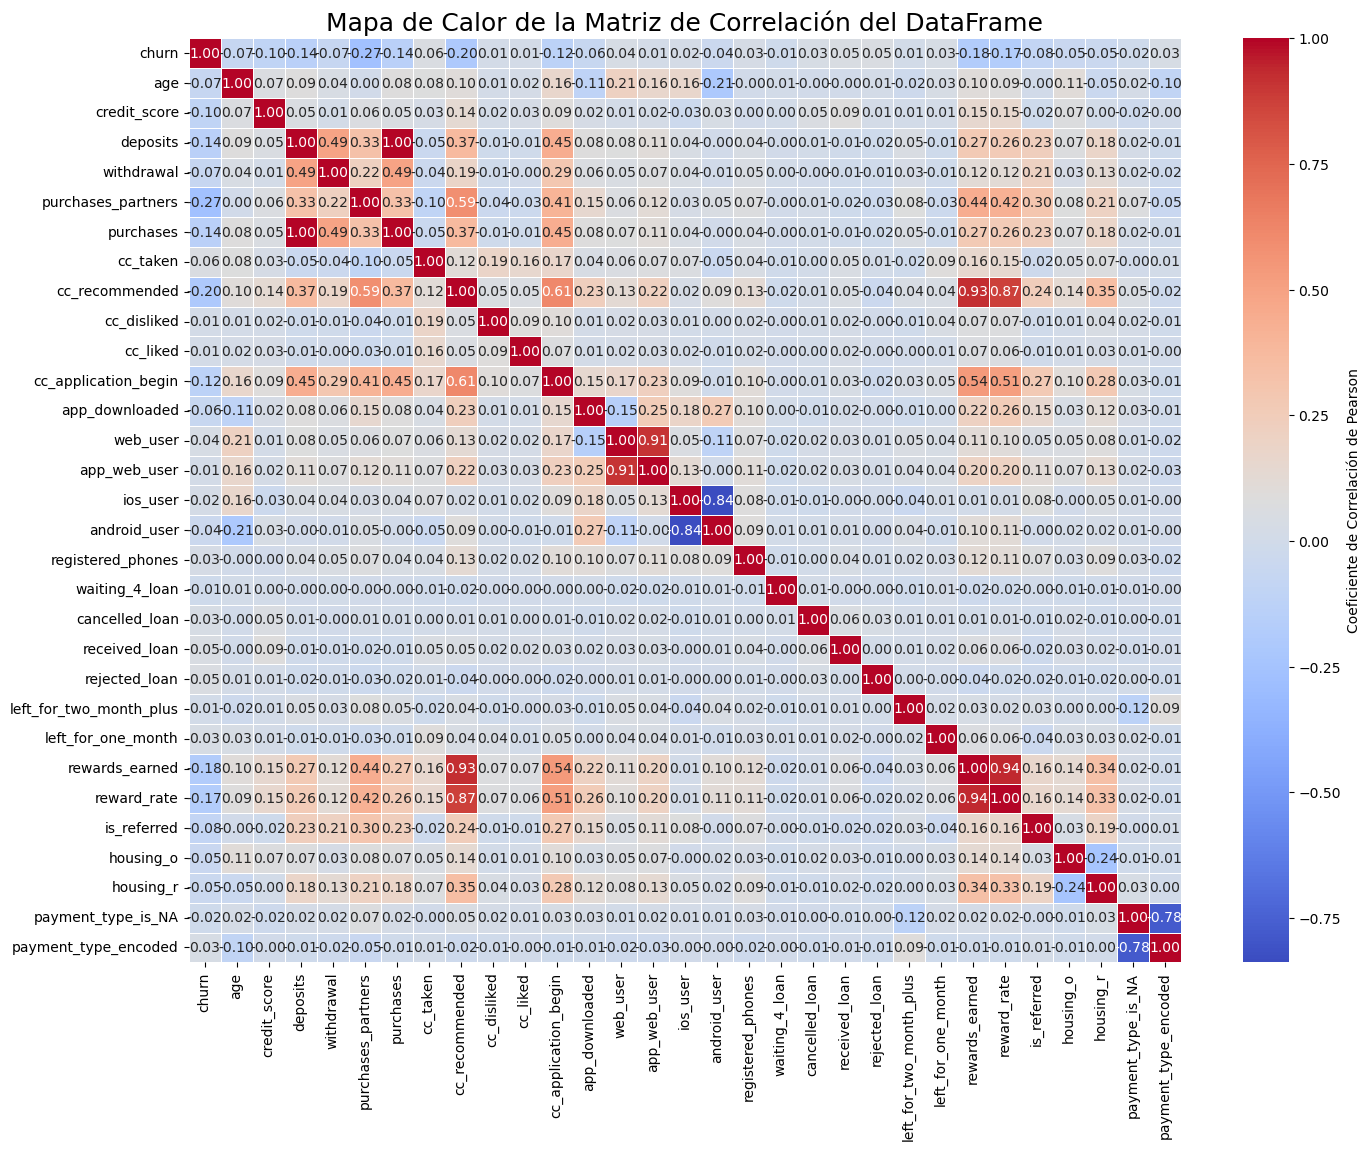

In [42]:
# c
matriz_correlacion = df.corr()

## Configurar la Figura y el Mapa de Calor
plt.figure(figsize=(16, 12))

sns.heatmap(
    matriz_correlacion,
    annot=True,         # Muestra el valor numérico de la correlación en cada celda
    fmt=".2f",          # Formatea los números con dos decimales
    cmap='coolwarm',    # Escala de colores (rojo para negativo, azul para positivo)
    linewidths=.5,      # Líneas para separar las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)

plt.title('Mapa de Calor de la Matriz de Correlación del DataFrame', fontsize=18)
plt.show()

    multicolinealidad
|modelo|Random Forest|XGBoost|Red neuronal|
|------|-------------|--------|-----------|
|impacto|bajo o nulo |bajo o nulo|moderado a bajo  |

|correlcion|entre        |Razon   | respuesta|
|----------|-------------|--------|-----------|
|1.00	   |deposits y purchases|Perfecta. El modelo recibe la misma información dos veces.|borrar una ambas tienen la misma correlacion con churn|
|0.91	   |web_user y app_web_user	|Muy Alta. Casi linealmente dependientes.|borrar app_web_user , web_user tiene mayor correlacion con churn|
|0.94 / 0.93 / 0.87|	rewards_earned, reward_rate, cc_recommended|Fuerte Redundancia. Un grupo de variables dice casi lo mismo.|conservar cc_recommended(mayor correlacion con churn)y borrar rewards_earned y reward_rate dado que tienen una correlacion alta con cc_recommended|

In [43]:
df.drop(columns=['deposits',"app_web_user","rewards_earned","reward_rate"], inplace=True)

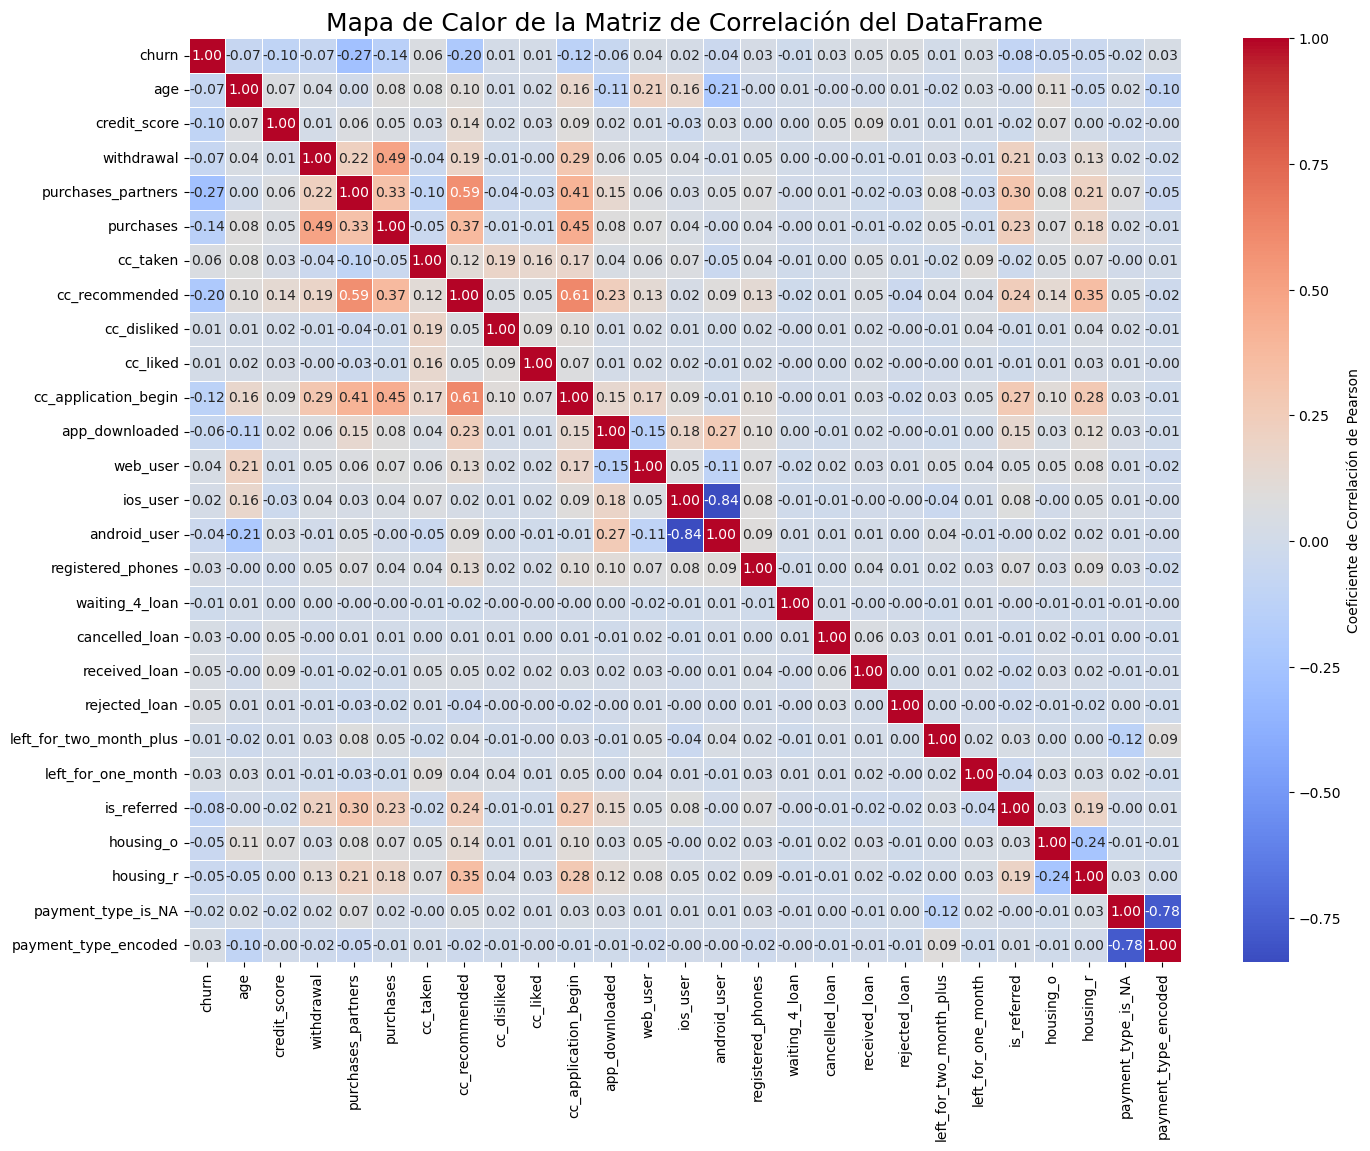

In [44]:
# c
matriz_correlacion = df.corr()

## Configurar la Figura y el Mapa de Calor
plt.figure(figsize=(16, 12))

sns.heatmap(
    matriz_correlacion,
    annot=True,         # Muestra el valor numérico de la correlación en cada celda
    fmt=".2f",          # Formatea los números con dos decimales
    cmap='coolwarm',    # Escala de colores (rojo para negativo, azul para positivo)
    linewidths=.5,      # Líneas para separar las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)

plt.title('Mapa de Calor de la Matriz de Correlación del DataFrame', fontsize=18)
plt.show()

In [48]:
df.to_parquet(r"../datos/dataset_modelo.parquet")

# <hr>